# Notebook 2: EDA + Stationarity (Bitcoin)

**Goal**
- Load the cleaned BTC dataset
- Do time-series EDA (trend + volatility)
- Check stationarity using ADF test
- Create log returns
- Plot ACF & PACF (for ARIMA guidance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1) Load Cleaned Dataset

In [5]:
df = pd.read_csv("C:/Projects/05_bitcoin_forecasting/data/btc_cleaned.csv", header=[0,1], index_col=0, parse_dates=True)
print("Shape:", df.shape)
df.head()

Shape: (1827, 1)


Price,Close
Ticker,BTC-USD
Date,
2021-02-19,55888.132812
2021-02-20,56099.519531
2021-02-21,57539.945312
2021-02-22,54207.320312
2021-02-23,48824.425781


## (2) Plot closing price

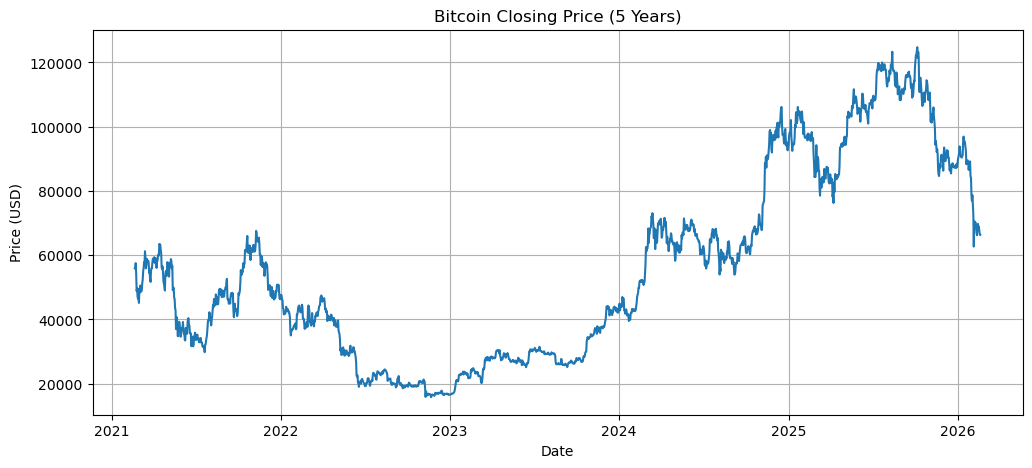

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"])
plt.title("Bitcoin Closing Price (5 Years)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

The Bitcoin closing price shows strong trend behaviour and large fluctuations over time. During this 5 years,the bit coin price got the peak price as approximately 120,000 USD in the 2025 and in 2026, it decreased into 70,000 USD.

## 3) Rolling Statistics (Volatility View)

Rolling mean and rolling standard deviation help visualize stability/volatility over time.

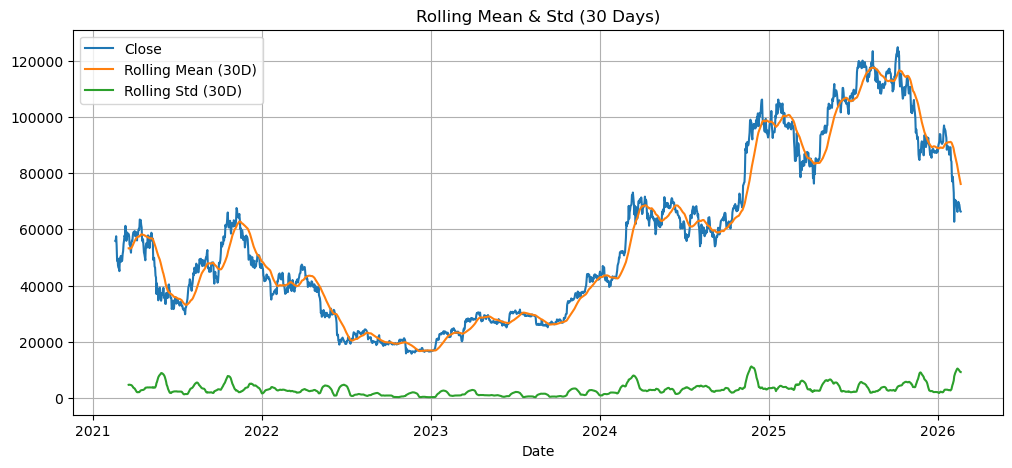

In [7]:
window = 30  # 30-day window

rolling_mean = df["Close"].rolling(window=window).mean()
rolling_std = df["Close"].rolling(window=window).std()

plt.figure(figsize=(12,5))
plt.plot(df.index, df["Close"], label="Close")
plt.plot(df.index, rolling_mean, label="Rolling Mean (30D)")
plt.plot(df.index, rolling_std, label="Rolling Std (30D)")
plt.title("Rolling Mean & Std (30 Days)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

The rolling mean and the rolling standard are not constant over time, and it shows that the bit coin price is non-stationary. The changing variance indicates volatility clustrering, which is very common in the crypticurrency markets.

## 4) ADF Test (Close Price)

**Interpretation**
- p-value < 0.05 → stationary
- p-value ≥ 0.05 → non-stationary

In [8]:
adf_close = adfuller(df["Close"])

print("ADF Statistic (Close):", adf_close[0])
print("p-value (Close):", adf_close[1])

ADF Statistic (Close): -1.2540456874710388
p-value (Close): 0.6499256807180501


p-value is greater than 0.05 , therefore, **we fail to reject the null hypothesis**. That means " The bitcoin closing price series is **non-stationary**". Therefore, we can denote that We cannot apply ARIMA on raw price.

## 5) Create Log Returns

Log returns are commonly used in finance and often help stabilize variance.

In [9]:
df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))
df = df.dropna()

print("After log returns shape:", df.shape)
df.head()

After log returns shape: (1826, 2)


Price,Close,Log_Return
Ticker,BTC-USD,
Date,,
2021-02-20,56099.519531,0.003775
2021-02-21,57539.945312,0.025352
2021-02-22,54207.320312,-0.059663
2021-02-23,48824.425781,-0.104585
2021-02-24,49705.332031,0.017881


## 6) Plot Log Returns

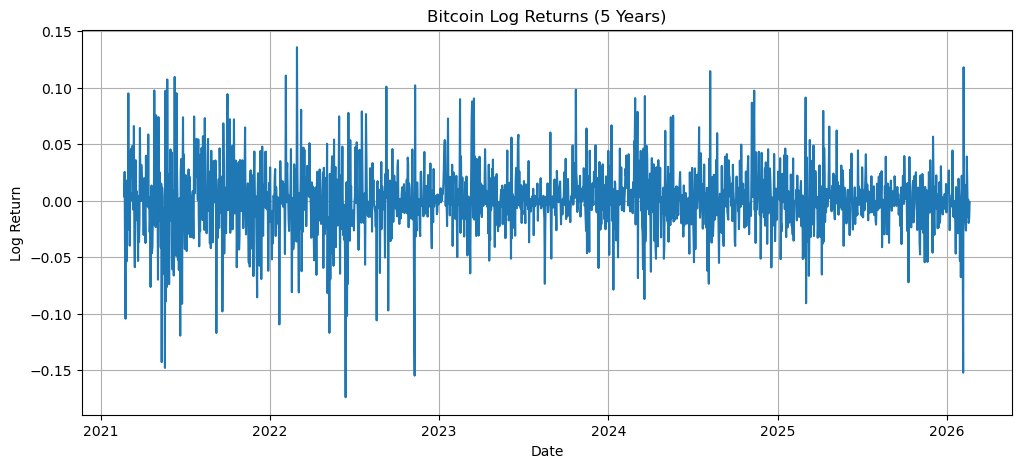

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Log_Return"])
plt.title("Bitcoin Log Returns (5 Years)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

The log return series fluctuates around a constant mean close to zero, suggesting removal of long-term trend and stabilization of variance.
This is typical for financial return series.

## 7) ADF Test (Log Returns)

In [11]:
adf_lr = adfuller(df["Log_Return"])

print("ADF Statistic (Log_Return):", adf_lr[0])
print("p-value (Log_Return):", adf_lr[1])

ADF Statistic (Log_Return): -7.827375756190885
p-value (Log_Return): 6.427732825304116e-12


p-value is less than 0.05, therefore **we reject the null hypothesis**. That means the log return series is stationary.

## 8) ACF & PACF (Log Returns)

These plots help guide ARIMA order selection.

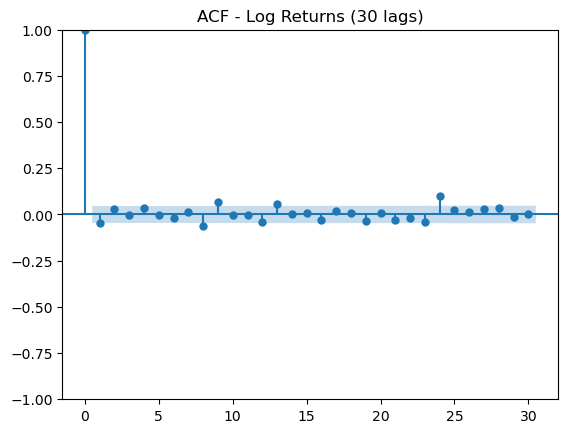

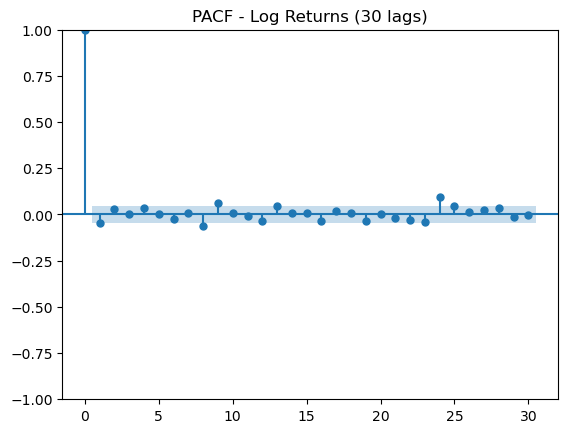

In [12]:
plot_acf(df["Log_Return"], lags=30)
plt.title("ACF - Log Returns (30 lags)")
plt.show()

plot_pacf(df["Log_Return"], lags=30)
plt.title("PACF - Log Returns (30 lags)")
plt.show()

### Interpretation of ACF & PACF (Log Returns)

The ACF plot shows that almost all autocorrelation values after lag 0 are very close to zero and lie within the confidence interval. This suggests that there is weak linear dependence between past and future log returns.

Similarly, the PACF plot does not show any significant spikes at specific lags. This indicates that there is no strong autoregressive structure present in the log return series.

Overall, both plots suggest that Bitcoin log returns behave close to a white noise process, meaning that short-term returns are largely unpredictable using simple linear time-series models.

This result aligns with financial theory, particularly the Efficient Market Hypothesis, which states that asset returns are difficult to predict using past information.

## Conclusion
The bitcoin closing price series is non-stationary, by interpreting plot and ADF test (p is greater than 0.05). After transforming the data into log returns, the series becomes stationary ( p is less than 0.05) and now that can be used for the ARIMA model. The ACF and PACF plots indicate weak autocorrelation, suggesting limited linear predictability in short-term Bitcoin return.